Load the data and quick look


In [29]:
import pandas as pd


amazon_stock_df =pd.read_csv('AMZN.csv')
amazon_stock_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


Description of different columns

In [9]:
amazon_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6516 entries, 0 to 6515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6516 non-null   object 
 1   Open       6516 non-null   float64
 2   High       6516 non-null   float64
 3   Low        6516 non-null   float64
 4   Close      6516 non-null   float64
 5   Adj Close  6516 non-null   float64
 6   Volume     6516 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 356.5+ KB


By generating histograms, we can visually inspect the distribution of numerical features in the dataset.

Identify Outliers: Histograms help in spotting outliers and unusual data points in the features.
Understand Data Spread: They provide insights into the spread and central tendency of the data.
Feature Engineering: The visual information can be useful for feature engineering, such as deciding on transformations or handling skewed data.

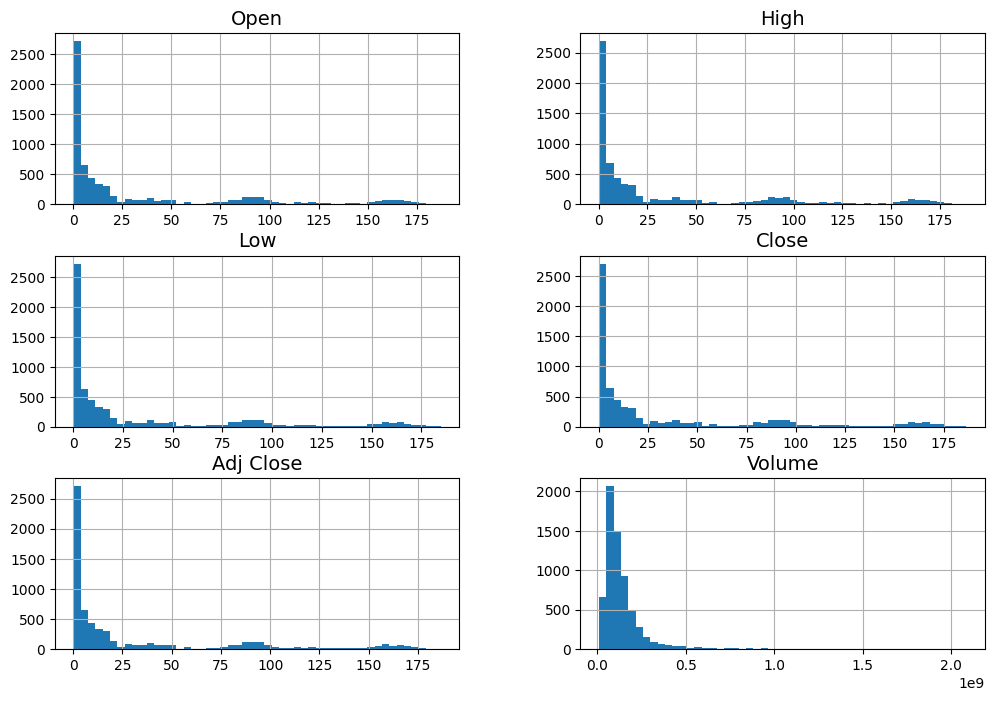

In [11]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=34)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
# Generate histograms for each numerical column in the DataFrame
amazon_stock_df.hist(bins=50, figsize=(12, 8)) # Plot histograms with 50 bins and a figure size of 12x8 inches
plt.show()

more graphs

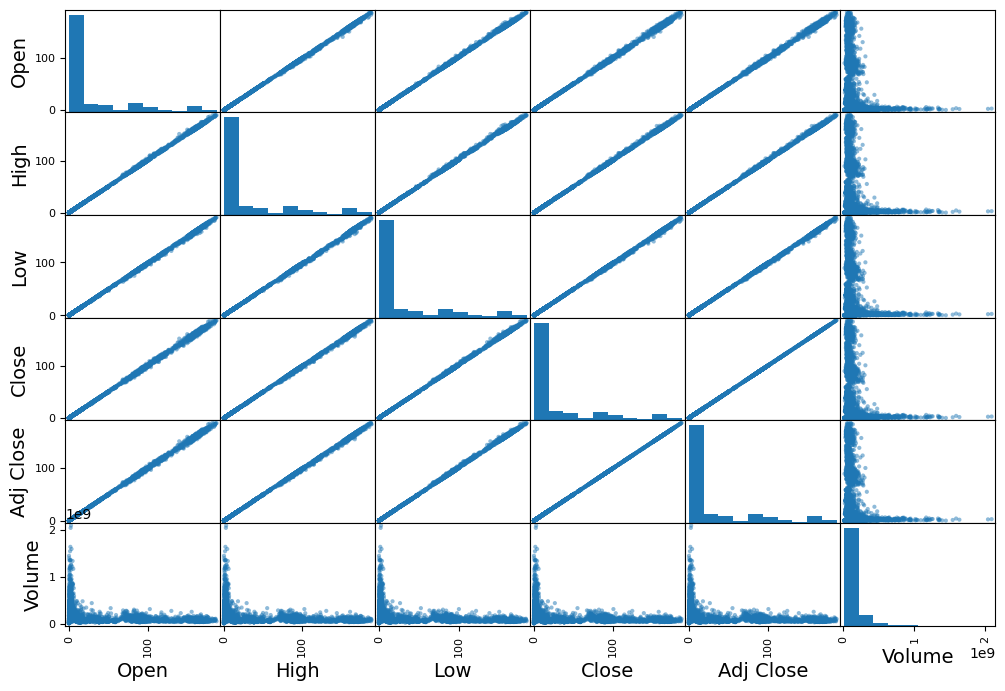

In [12]:
from pandas.plotting import scatter_matrix
attributes = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
scatter_matrix(amazon_stock_df[attributes], figsize=(12, 8))
#save_fig("scatter_matrix_plot")  # extra code
plt.show()

In [19]:

# Selecting features (Open, High, Low, Volume) and target (Close)
X = amazon_stock_df[['Open', 'High', 'Low', 'Volume']]  # Features
y = amazon_stock_df['Close']  # Target (Close price)
y.head()


,Close
0,0.097917
1,0.086458
2,0.085417
3,0.081771
4,0.071354


Selecting feature and predictor

In [25]:
# Number of days to predict into the future
days_to_predict = 50

# New prediction column (shifting 'Close' column up by 90 days)
amazon_stock_df['Prediction'] = amazon_stock_df['Close'].shift(-days_to_predict)

## Removing the rows with NaN values (which occur after the shift)
amazon_stock_df = amazon_stock_df.dropna()
amazon_stock_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.116146
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.123958
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.122396
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.119792
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.120833


# Split into training and testing sets

In [30]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaling the data

In [32]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

Use Linear Regression model

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Store RMSE results for each model
rmse_results = {}

# Create and train the linear regression model
lin_reg = LinearRegression()

# Perform 10-fold cross-validation using randomly splitted training set on the Decision Tree Regressor
# The negative sign is because cross_val_score returns negative values for metrics where lower is better
lin_reg_rmses = -cross_val_score(lin_reg, X_train_scaled, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

#lin_reg.fit(X_train_scaled, y_train)
rmse_results['Linear Regression'] = pd.Series(lin_reg_rmses).mean()
pd.Series(lin_reg_rmses).describe()



,0
count,10.000000
mean,0.429059
std,0.039927
min,0.365165
25%,0.406601
50%,0.427664
75%,0.453072
max,0.499933


Use Decision Tree model

In [39]:
# prompt: Use Decision Tree model as above ccode i did for LinearRegression

from sklearn.tree import DecisionTreeRegressor

# Create and train the Decision Tree Regression model
tree_reg = DecisionTreeRegressor()

# Perform 10-fold cross-validation using randomly splitted training set on the Decision Tree Regressor
# The negative sign is because cross_val_score returns negative values for metrics where lower is better
tree_reg_rmses = -cross_val_score(tree_reg, X_train_scaled, y_train,
                                scoring="neg_root_mean_squared_error", cv=10)

rmse_results['Decision Tree Regression'] = pd.Series(tree_reg_rmses).mean()
pd.Series(tree_reg_rmses).describe()

# You can now compare the RMSE results of Linear Regression and Decision Tree Regression
# to determine which model performs better on your dataset.
print(rmse_results)

{'Linear Regression': 0.42905923337535057, 'Decision Tree Regression': 0.7786382010318668}


Use RandomForestRegressor model

In [40]:
# prompt: do same thing as above modle for RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Regression model
forest_reg = RandomForestRegressor()

# Perform 10-fold cross-validation using randomly splitted training set on the Random Forest Regressor
# The negative sign is because cross_val_score returns negative values for metrics where lower is better
forest_reg_rmses = -cross_val_score(forest_reg, X_train_scaled, y_train,
                                  scoring="neg_root_mean_squared_error", cv=10)

rmse_results['Random Forest Regression'] = pd.Series(forest_reg_rmses).mean()
pd.Series(forest_reg_rmses).describe()

# You can now compare the RMSE results of Linear Regression, Decision Tree Regression, and Random Forest Regression
# to determine which model performs better on your dataset.
print(rmse_results)

{'Linear Regression': 0.42905923337535057, 'Decision Tree Regression': 0.7786382010318668, 'Random Forest Regression': 0.5977306595714744}


Use  SVR (Support Vector Regressor) Model

In [41]:
# prompt: I want to do same thing as above by using  SVR (Support Vector Regressor) Model

from sklearn.svm import SVR

# Create and train the SVR model
svr_reg = SVR(kernel='rbf')  # You can experiment with different kernels (linear, poly, rbf)

# Perform 10-fold cross-validation using randomly splitted training set on the SVR model
# The negative sign is because cross_val_score returns negative values for metrics where lower is better
svr_reg_rmses = -cross_val_score(svr_reg, X_train_scaled, y_train,
                                scoring="neg_root_mean_squared_error", cv=10)

rmse_results['Support Vector Regression'] = pd.Series(svr_reg_rmses).mean()
pd.Series(svr_reg_rmses).describe()

# You can now compare the RMSE results of all models (Linear Regression, Decision Tree Regression, Random Forest Regression, and SVR)
# to determine which model performs better on your dataset.
print(rmse_results)

{'Linear Regression': 0.42905923337535057, 'Decision Tree Regression': 0.7786382010318668, 'Random Forest Regression': 0.5977306595714744, 'Support Vector Regression': 2.924357061950553}


KNeighborsRegressor

In [57]:
# prompt: same as above for model KNeighborsRegressor

from sklearn.neighbors import KNeighborsRegressor

# Create and train the KNeighborsRegressor model
knn_reg = KNeighborsRegressor(n_neighbors=4)  # You can adjust the number of neighbors

# Perform 10-fold cross-validation using randomly splitted training set on the KNN model
# The negative sign is because cross_val_score returns negative values for metrics where lower is better
knn_reg_rmses = -cross_val_score(knn_reg, X_train_scaled, y_train,
                                scoring="neg_root_mean_squared_error", cv=10)

rmse_results['K-Nearest Neighbors Regression'] = pd.Series(knn_reg_rmses).mean()
pd.Series(knn_reg_rmses).describe()

# You can now compare the RMSE results of all models (Linear Regression, Decision Tree Regression, Random Forest Regression, SVR, and KNN)
# to determine which model performs better on your dataset.
print(rmse_results)
knn_reg.fit(X_train_scaled, y_train)

{'Linear Regression': 0.42905923337535057, 'Decision Tree Regression': 0.7786382010318668, 'Random Forest Regression': 0.5977306595714744, 'Support Vector Regression': 2.924357061950553, 'K-Nearest Neighbors Regression': 0.9100880707923944}


Plot a grph for different modle and their RMSE values

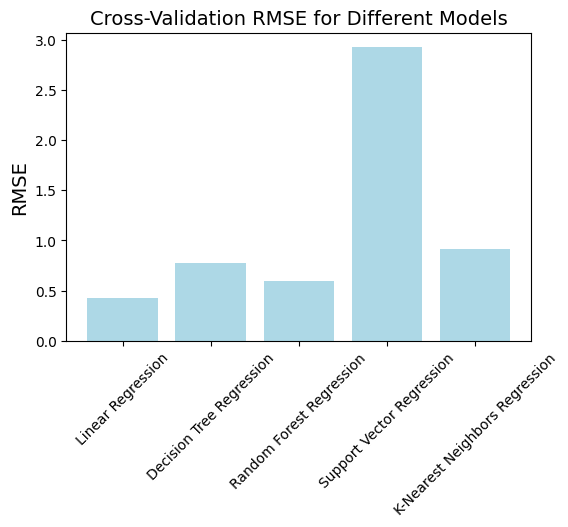

In [46]:
# Plot cross-validation RMSE for comparison
plt.figure(figsize=(6, 4))
plt.bar(rmse_results.keys(), rmse_results.values(), color='lightblue')
plt.title('Cross-Validation RMSE for Different Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

Now test with test set

In [53]:
# Evaluate the tuned model on the test set
import numpy as np
from sklearn.metrics import mean_squared_error
lin_reg.fit(X_train_scaled, y_train)
y_test_pred = lin_reg.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f' Linear Regression Test RMSE: {test_rmse}')
print(y_test[:5])
print(y_test_pred[:5])



 Linear Regression Test RMSE: 679810.4428636117
5934    155.820999
1872      1.698500
1002      0.846000
6038    158.073502
6225    161.413498
Name: Close, dtype: float64
[-191365.67387057 -683262.78482808 -329793.66026873 -209784.68960889
 -238951.96815208]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


plot a grpah with predicted and actual value

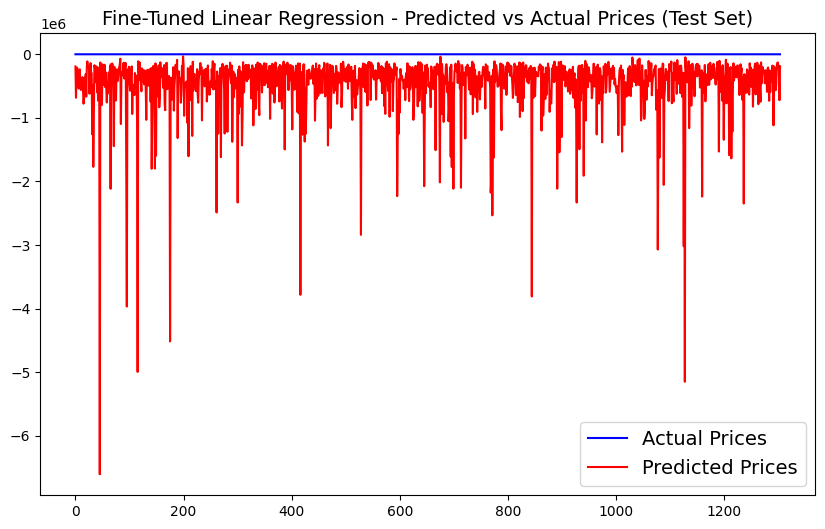

In [50]:
# Plot predicted vs actual prices for test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_test_pred, label='Predicted Prices', color='red')
plt.title('Fine-Tuned Linear Regression - Predicted vs Actual Prices (Test Set)')
plt.legend()
plt.show()

Linear Regression Cross-Validation RMSE: 10.501927541806392


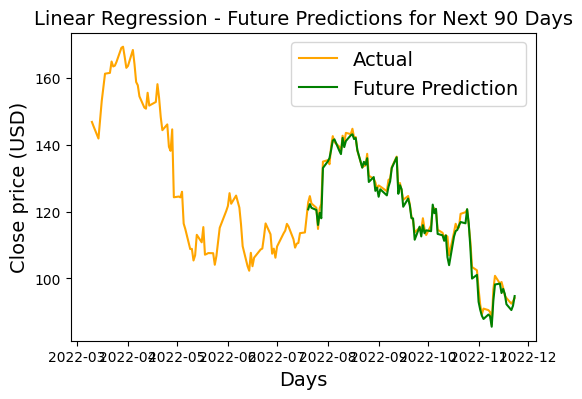

Decision Tree Cross-Validation RMSE: 11.285870025809293


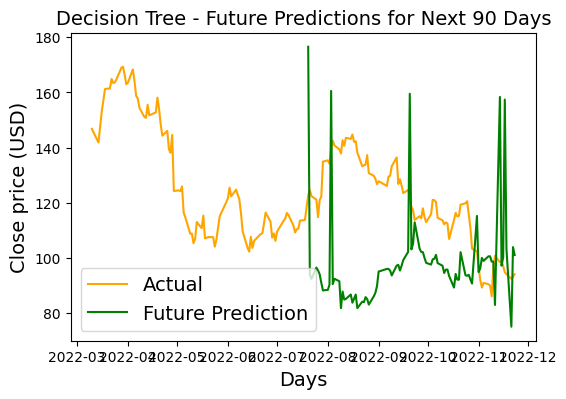

Random Forest Cross-Validation RMSE: 8.768947775692823


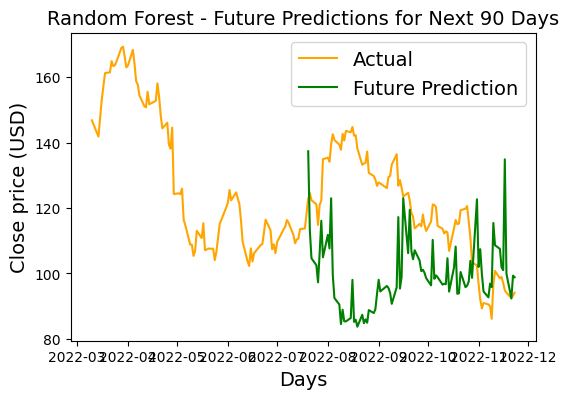

SVR Cross-Validation RMSE: 8.902596915673618


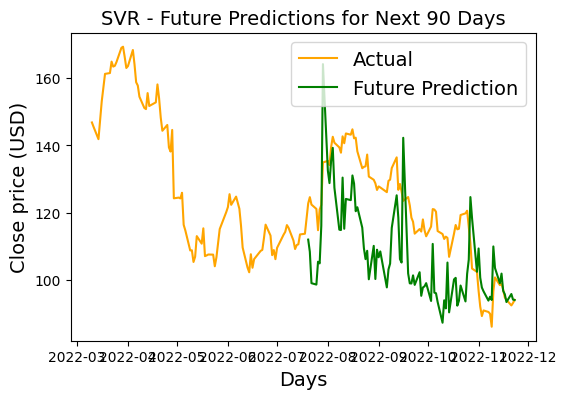

KNeighbors Cross-Validation RMSE: 9.019269413102684


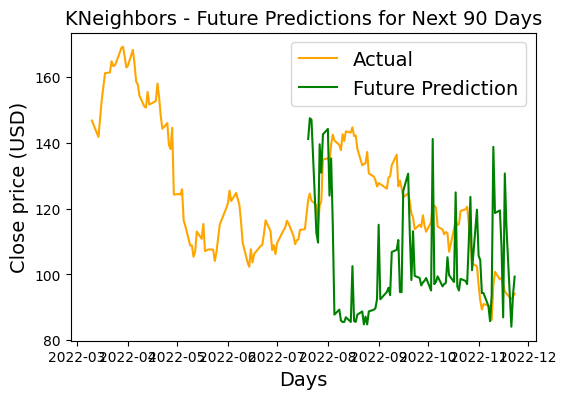

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Random Forest Test RMSE: 7.870431643025024


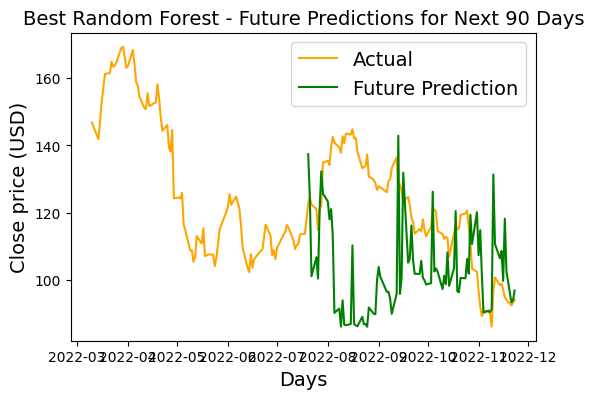

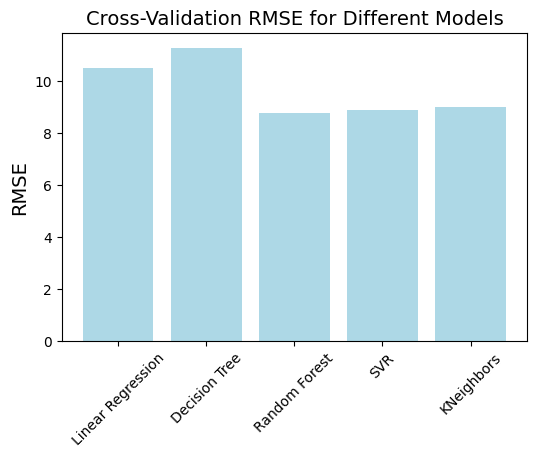

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset (adjust the path to your dataset)
df = pd.read_csv('AMZN.csv')

# Convert 'Date' to datetime format if not already done
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Selecting features (Open, High, Low, Volume) and target (Close)
X = df[['Open', 'High', 'Low', 'Volume']]  # Features
y = df['Close']  # Target (Close price)

# Number of days to predict into the future
days_to_predict = 90

# New prediction column (shifting 'Close' column up by 90 days)
df['Prediction'] = df['Close'].shift(-days_to_predict)

# Removing the rows with NaN values (which occur after the shift)
df = df.dropna()

# Splitting features and target
X = df[['Open', 'High', 'Low', 'Volume']]  # Adjusted features
y = df['Prediction']  # Adjusted target (90-day future close price)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for SVR, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf', C=1e3),
    'KNeighbors': KNeighborsRegressor(n_neighbors=4)
}

# Cross-Validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store RMSE results for each model
rmse_results = {}

# Train models with cross-validation and evaluate performance
for name, model in models.items():
    # Perform cross-validation on the scaled training data
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)

    # Save the mean cross-validated RMSE for comparison
    rmse_results[name] = np.mean(cv_rmse)

    print(f'{name} Cross-Validation RMSE: {np.mean(cv_rmse)}')

    # Train the model on the full training set
    model.fit(X_train_scaled, y_train)

    # --- Evaluate on the test set ---
    # Predict on the test set
    y_test_pred = model.predict(X_test_scaled)


    # --- Predict for the next "days_to_predict" days ---
    # Getting rows from the dataset except the last "days_to_predict" days
    # Ensure to select the same features ['Open', 'High', 'Low', 'Volume']
    future_data = df[['Open', 'High', 'Low', 'Volume']].tail(days_to_predict)  # Selecting the last "days_to_predict" rows with consistent features

    # Scaling future data
    future_scaled = scaler.transform(future_data)

    # Making future predictions
    future_predictions = model.predict(future_scaled)

    # Plot future predictions
    future_index = df.index[-days_to_predict:]  # Get the index for the future days
    plt.figure(figsize=(6, 4))

    # Plot actual data for comparison
    plt.plot(df.index[-2 * days_to_predict:], df['Close'].tail(2 * days_to_predict), label='Actual', color='orange')

    # Plot future predictions
    plt.plot(future_index, future_predictions, label='Future Prediction', color='green')

    plt.title(f'{name} - Future Predictions for Next {days_to_predict} Days')
    plt.xlabel('Days')
    plt.ylabel('Close price (USD)')
    plt.legend()
    plt.show()

# --- Hyperparameter Tuning for Random Forest ---
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model for tuning
rf = RandomForestRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Fit the model with the best parameters
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Predict on the test set with the best model
y_test_pred_rf = best_rf.predict(X_test_scaled)

# Calculate test RMSE for the best Random Forest model
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
print(f'Best Random Forest Test RMSE: {test_rmse_rf}')

# --- Predict for the next "days_to_predict" days using the best Random Forest model ---
# Getting rows from the dataset except the last "days_to_predict" days
# Ensure to select the same features ['Open', 'High', 'Low', 'Volume']
future_data_rf = df[['Open', 'High', 'Low', 'Volume']].tail(days_to_predict)  # Selecting the last "days_to_predict" rows with consistent features

# Scaling future data for the best model
future_scaled_rf = scaler.transform(future_data_rf)

# Making future predictions
future_predictions_rf = best_rf.predict(future_scaled_rf)

# Plot future predictions for the best Random Forest model
plt.figure(figsize=(6, 4))

# Plot actual data for comparison
plt.plot(df.index[-2 * days_to_predict:], df['Close'].tail(2 * days_to_predict), label='Actual', color='orange')

# Plot future predictions
plt.plot(future_index, future_predictions_rf, label='Future Prediction', color='green')

plt.title('Best Random Forest - Future Predictions for Next 90 Days')
plt.xlabel('Days')
plt.ylabel('Close price (USD)')
plt.legend()
plt.show()

# --- Cross-validation RMSE comparison plot ---
plt.figure(figsize=(6, 4))
plt.bar(rmse_results.keys(), rmse_results.values(), color='lightblue')
plt.title('Cross-Validation RMSE for Different Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()
